In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from IPython.display import Image, display

In [2]:
%matplotlib inline

pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 999
pd.options.display.max_columns = 999

plt.style.use('ggplot')

In [3]:
def check_path(path):
    files = path.split('/')
    tmp_path = ''
    
    for file in files:
        tmp_path += f"{file}/"
        if not os.path.exists(tmp_path):
            os.mkdir(tmp_path)
        else:
            print(f'File: **{file}** exists')
            

def categorize_bands(x):
    categories = [
        "NO_DATA", "SATURATED_DEFECTIVE", "DARK_FEATURE_SHADOW",
        "CLOUD_SHADOW", "VEGETATION", "NOT_VEGETATION",
        "WATER", "UNCLASSIFIED", "CLOUD_MEDIUM_PROBA",
        "CLOUD_HIGH_PROBA", "THIN_CIRRUS", "SNOW_ICE"
    ]
    
    for i in range(len(categories)):
        if x == i:
            return categories[i]

---

In [4]:
ls "../data/processed_raw/sentinel_bands"

 El volumen de la unidad C es Windows
 El n£mero de serie del volumen es: CAD2-CEC1

 Directorio de C:\Users\camil\codes\backup_tesis\tesis\data\processed_raw\sentinel_bands

31/05/2021  06:37 p.ÿm.    <DIR>          .
31/05/2021  06:37 p.ÿm.    <DIR>          ..
31/05/2021  06:37 p.ÿm.    <DIR>          .ipynb_checkpoints
31/05/2021  06:37 p.ÿm.    <DIR>          PixEx
30/04/2021  12:18 a.ÿm.         2.886.387 S2A_MSIL2A_20160110T152632_N0201_R025_T18NXM_20160110T153105_processed.csv
30/04/2021  12:28 a.ÿm.         2.886.387 S2A_MSIL2A_20160110T152632_N0201_R025_T18NXM_20160110T153105_PROCESSED_SOIL.csv
30/04/2021  12:28 a.ÿm.            80.409 S2A_MSIL2A_20160110T152632_N0201_R025_T18NXM_20160110T153105_PROCESSED_VEGETATION.csv
               3 archivos      5.853.183 bytes
               4 dirs  575.107.665.920 bytes libres


---

In [5]:
sentinel2_bands = {  
    'B1': [432.3, 452.3],  
    'B2': [459.6, 524.6],  
    'B3': [541.5, 576.5],  
    'B4': [650, 680],  
    'B5': [696.3, 711.3],  
    'B6': [731.6, 746.6],  
    'B7': [769.7, 789.7],  
    'B8': [775.5, 890.5],  
    'B8A': [854, 874],  
    'B9': [933.2, 953.2],  
#     'B10': [1361.9, 1391.9],  
    'B11': [1565.4, 1655.4],  
    'B12': [2112.4, 2292.4]  
}  

In [6]:
df = pd.read_csv('../data/processed_raw/sentinel_bands/S2A_MSIL2A_20160110T152632_N0201_R025_T18NXM_20160110T153105_PROCESSED_SOIL.csv', sep=';')
print(df.shape)
df.head()

(653, 325)


X     Y        lon       lat departamento municipio   cultivo  \
0  2071  3162 -73.513627  5.914703       BOYACA     TOGUI  PRADERAS   
1  2141  3162 -73.507327  5.914703       BOYACA     TOGUI   PRADERA   
2  2211  3162 -73.501027  5.914703       BOYACA     TOGUI  PRADERAS   
3  2002  3092 -73.519927  5.921003       BOYACA     TOGUI   PRADERA   
4  2071  3092 -73.513627  5.921003       BOYACA     TOGUI      CAÑA   

  topografia    pH         OM        Ca        Mg         K        Na  \
0  PENDIENTE  4.70   3.011138  0.481978  0.213796  0.171674  0.146597   
1   ONDULADO  5.00  12.271341  1.287727  0.418722  0.421729  0.201236   
2  PENDIENTE  5.07   5.326189  3.592768  0.533857  0.213425  0.176261   
3  PENDIENTE  4.55   7.198116  1.198907  0.452394  0.428312  0.220661   
4  PENDIENTE  4.44   4.643188  2.353349  0.526435  0.336426  0.173677   

        400     408.5       417     425.5       434     442.5       451  \
0  0.864947  0.875096  0.874840  0.865835  0.851385  0.838967  0.833089   
1  1.069311  1.083294  1.088555  1.088504  1.085334  1.083149  1.082783   
2  0.877127  0.886268  0.886303  0.879617  0.869511  0.860241  0.855032   
3  1.052266  1.061579  1.063576  1.059229  1.051809  1.045210  1.041014   
4  0.908724  0.922303  0.925949  0.922642  0.915262  0.907996  0.903691   

      459.5       468     476.5       485     493.5       502     510.5  \
0  0.831834  0.829409  0.821083  0.804732  0.781411  0.754565  0.726855   
1  1.083112  1.081964  1.076658  1.066428  1.051789  1.034754  1.016701   
2  0.852350  0.848925  0.842054  0.829852  0.812868  0.793225  0.772665   
3  1.038498  1.035626  1.029633  1.018893  1.003829  0.986159  0.967215   
4  0.901126  0.897690  0.890796  0.878603  0.861210  0.840475  0.817862   

        519     527.5       536     544.5       553     561.5       570  \
0  0.699120  0.671711  0.645430  0.620700  0.597969  0.578164  0.561325   
1  0.998321  0.980104  0.962534  0.945646  0.929548  0.914562  0.900663   
2  0.751851  0.731388  0.712039  0.693998  0.677440  0.662717  0.649682   
3  0.947658  0.928154  0.909437  0.891614  0.874809  0.859553  0.845837   
4  0.794340  0.770628  0.747546  0.725419  0.704433  0.685423  0.668302   

      578.5       587     595.5       604     612.5       621     629.5  \
0  0.547276  0.535821  0.526254  0.517484  0.508804  0.500029  0.490974   
1  0.887977  0.876891  0.866976  0.856959  0.846021  0.834071  0.821366   
2  0.638070  0.627858  0.618654  0.609739  0.600563  0.591058  0.581309   
3  0.833644  0.823037  0.813537  0.804248  0.794578  0.784506  0.774178   
4  0.652799  0.638854  0.626298  0.614638  0.603423  0.592386  0.581148   

        638     646.5       655     663.5       672     680.5       689  \
0  0.481710  0.472552  0.463779  0.455267  0.446919  0.438797  0.430990   
1  0.808295  0.795461  0.783328  0.771584  0.759787  0.748108  0.736988   
2  0.571450  0.561756  0.552484  0.543373  0.534041  0.524660  0.515670   
3  0.763846  0.753718  0.744099  0.734745  0.725192  0.715618  0.706465   
4  0.569675  0.558338  0.547423  0.536721  0.526042  0.515504  0.505360   

      697.5       706     714.5       723     731.5       740     748.5  \
0  0.423477  0.416262  0.409397  0.402926  0.396867  0.391249  0.386078   
1  0.726427  0.716299  0.706607  0.697281  0.688294  0.679613  0.671239   
2  0.507153  0.499010  0.491231  0.483808  0.476694  0.469876  0.463342   
3  0.697826  0.689650  0.681940  0.674678  0.667789  0.661245  0.655072   
4  0.495637  0.486326  0.477467  0.469093  0.461192  0.453767  0.446832   

        757     765.5       774     782.5       791     799.5       808  \
0  0.381368  0.377009  0.372938  0.369263  0.365900  0.362648  0.359597   
1  0.663101  0.655054  0.647190  0.639686  0.632433  0.625190  0.618099   
2  0.457099  0.451096  0.445325  0.439916  0.434844  0.429944  0.425345   
3  0.649251  0.643567  0.638045  0.632857  0.627918  0.623029  0.618234   
4  0.440348  0.434165  0.428308  0.422947  0.417941  0.4130

In [7]:
model_cols = {
    'sentinel2_soil_indices': [
        'pH', 'OM', 'Ca', 'Mg', 'K', 'Na', 'B1', 'B2', 'B3',
        'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12',
        'NDVI', 'GNDVI', 'EVI', 'AVI', 'SAVI', 'NDMI', 'MSI',
        'GCI', 'NBR', 'BSI', 'NDWI', 'NDSI', 'NDGI','ARVI', 'SIPI'
    ],
    'sentinel2_soil': [
        'pH', 'OM', 'Ca', 'Mg', 'K', 'Na', 'B1', 'B2', 'B3',
        'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12'
    ],
    'sentinel2_all_indices': [
        'pH', 'OM', 'Ca', 'Mg', 'K', 'Na', 'B1', 'B2', 'B3',
        'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12',
        'NDVI', 'GNDVI', 'EVI', 'AVI', 'SAVI', 'NDMI', 'MSI',
        'GCI', 'NBR', 'BSI', 'NDWI', 'NDSI', 'NDGI','ARVI', 'SIPI'
    ],
    'sentinel2_all': [
        'pH', 'OM', 'Ca', 'Mg', 'K', 'Na', 'B1', 'B2', 'B3',
        'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12'
    ]
}


In [8]:
df_ = df[df['quality_scene_classification'].isin([4, 5])]
print(df_.shape)
df_.head()

(607, 325)


X     Y        lon       lat departamento municipio   cultivo  \
0  2071  3162 -73.513627  5.914703       BOYACA     TOGUI  PRADERAS   
1  2141  3162 -73.507327  5.914703       BOYACA     TOGUI   PRADERA   
2  2211  3162 -73.501027  5.914703       BOYACA     TOGUI  PRADERAS   
3  2002  3092 -73.519927  5.921003       BOYACA     TOGUI   PRADERA   
4  2071  3092 -73.513627  5.921003       BOYACA     TOGUI      CAÑA   

  topografia    pH         OM        Ca        Mg         K        Na  \
0  PENDIENTE  4.70   3.011138  0.481978  0.213796  0.171674  0.146597   
1   ONDULADO  5.00  12.271341  1.287727  0.418722  0.421729  0.201236   
2  PENDIENTE  5.07   5.326189  3.592768  0.533857  0.213425  0.176261   
3  PENDIENTE  4.55   7.198116  1.198907  0.452394  0.428312  0.220661   
4  PENDIENTE  4.44   4.643188  2.353349  0.526435  0.336426  0.173677   

        400     408.5       417     425.5       434     442.5       451  \
0  0.864947  0.875096  0.874840  0.865835  0.851385  0.838967  0.833089   
1  1.069311  1.083294  1.088555  1.088504  1.085334  1.083149  1.082783   
2  0.877127  0.886268  0.886303  0.879617  0.869511  0.860241  0.855032   
3  1.052266  1.061579  1.063576  1.059229  1.051809  1.045210  1.041014   
4  0.908724  0.922303  0.925949  0.922642  0.915262  0.907996  0.903691   

      459.5       468     476.5       485     493.5       502     510.5  \
0  0.831834  0.829409  0.821083  0.804732  0.781411  0.754565  0.726855   
1  1.083112  1.081964  1.076658  1.066428  1.051789  1.034754  1.016701   
2  0.852350  0.848925  0.842054  0.829852  0.812868  0.793225  0.772665   
3  1.038498  1.035626  1.029633  1.018893  1.003829  0.986159  0.967215   
4  0.901126  0.897690  0.890796  0.878603  0.861210  0.840475  0.817862   

        519     527.5       536     544.5       553     561.5       570  \
0  0.699120  0.671711  0.645430  0.620700  0.597969  0.578164  0.561325   
1  0.998321  0.980104  0.962534  0.945646  0.929548  0.914562  0.900663   
2  0.751851  0.731388  0.712039  0.693998  0.677440  0.662717  0.649682   
3  0.947658  0.928154  0.909437  0.891614  0.874809  0.859553  0.845837   
4  0.794340  0.770628  0.747546  0.725419  0.704433  0.685423  0.668302   

      578.5       587     595.5       604     612.5       621     629.5  \
0  0.547276  0.535821  0.526254  0.517484  0.508804  0.500029  0.490974   
1  0.887977  0.876891  0.866976  0.856959  0.846021  0.834071  0.821366   
2  0.638070  0.627858  0.618654  0.609739  0.600563  0.591058  0.581309   
3  0.833644  0.823037  0.813537  0.804248  0.794578  0.784506  0.774178   
4  0.652799  0.638854  0.626298  0.614638  0.603423  0.592386  0.581148   

        638     646.5       655     663.5       672     680.5       689  \
0  0.481710  0.472552  0.463779  0.455267  0.446919  0.438797  0.430990   
1  0.808295  0.795461  0.783328  0.771584  0.759787  0.748108  0.736988   
2  0.571450  0.561756  0.552484  0.543373  0.534041  0.524660  0.515670   
3  0.763846  0.753718  0.744099  0.734745  0.725192  0.715618  0.706465   
4  0.569675  0.558338  0.547423  0.536721  0.526042  0.515504  0.505360   

      697.5       706     714.5       723     731.5       740     748.5  \
0  0.423477  0.416262  0.409397  0.402926  0.396867  0.391249  0.386078   
1  0.726427  0.716299  0.706607  0.697281  0.688294  0.679613  0.671239   
2  0.507153  0.499010  0.491231  0.483808  0.476694  0.469876  0.463342   
3  0.697826  0.689650  0.681940  0.674678  0.667789  0.661245  0.655072   
4  0.495637  0.486326  0.477467  0.469093  0.461192  0.453767  0.446832   

        757     765.5       774     782.5       791     799.5       808  \
0  0.381368  0.377009  0.372938  0.369263  0.365900  0.362648  0.359597   
1  0.663101  0.655054  0.647190  0.639686  0.632433  0.625190  0.618099   
2  0.457099  0.451096  0.445325  0.439916  0.434844  0.429944  0.425345   
3  0.649251  0.643567  0.638045  0.632857  0.627918  0.623029  0.618234   
4  0.440348  0.434165  0.428308  0.422947  0.417941  0.4130

In [11]:
for key, cols in model_cols.items():
    print(key)

    df_to_process = (
        df_[df_['quality_scene_classification'] == 5][cols].copy()
        if 'soil' in key.split('_')
        else df_[cols].copy()
    )
    
    df_to_process = df_to_process.rename(
        columns={
            i: f"{i}_{np.mean(sentinel2_bands[i])}" for i in df_to_process.columns if (len(i) > 1) and (i[1].isnumeric())
        }
    )
    print(df_to_process.shape)
    display(df_to_process.head())
    
    check_path(f'../data/interim_raw/{key}')
    df_to_process.to_csv(
        f'../data/interim_raw/{key}/satellite_{key}.csv',
        index=False,
        header=True,
        sep = ';',
        decimal = '.'
    )

sentinel2_soil_indices
(19, 33)


pH        OM         Ca        Mg         K        Na  B1_442.3  \
88   6.65  9.539340  34.552011  1.283865  0.319940  0.088900    0.0421   
137  4.84  3.277188   5.268932  0.860074  0.236551  0.218843    0.0518   
152  6.81  4.491411  22.106216  1.298166  0.276951  0.329939    0.0551   
251  6.56  3.996831  17.073114  1.058844  0.119232  0.161812    0.0348   
271  4.42  6.835504   1.179035  0.132695  0.169423  0.108512    0.0295   

     B2_492.1  B3_559.0  B4_665.0  B5_703.8  B6_739.1  B7_779.7  B8_833.0  \
88     0.0759    0.1091    0.1443    0.1631    0.2350    0.2630    0.3007   
137    0.0760    0.1086    0.1504    0.1753    0.2088    0.2338    0.2549   
152    0.0948    0.1405    0.1678    0.1578    0.2233    0.2305    0.2727   
251    0.0751    0.1103    0.1457    0.1577    0.2125    0.2377    0.2573   
271    0.0511    0.0787    0.1130    0.1442    0.1729    0.1959    0.2219   

     B8A_864.0  B9_943.2  B11_1610.4  B12_2202.4      NDVI     GNDVI  \
88      0.3067    0.3244      0.3671      0.2359  0.351461  0.467545   
137     0.2729    0.2665      0.4036      0.2650  0.257834  0.402476   
152     0.2578    0.3075      0.3157      0.2272  0.238139  0.319942   
251     0.2699    0.3001      0.3159      0.2170  0.276923  0.399891   
271     0.2275    0.2409      0.3278      0.2137  0.325172  0.476381   

          EVI       AVI      SAVI      NDMI       MSI       GCI       NBR  \
88   0.244796  0.342687  0.255830 -0.099431  1.220818  1.973419  0.120760   
137  0.164588  0.282857  0.179078 -0.225816  1.583366  1.453959 -0.019427   
152  0.167198  0.287671  0.172478 -0.073080  1.157682  1.188612  0.091018   
251  0.177905  0.290562  0.191775 -0.102233  1.227750  1.720762  0.084967   
271  0.179507  0.277781  0.203840 -0.192651  1.477242  2.060991  0.018825   

          BSI      NDWI      NDSI      NDGI      ARVI      SIPI  
88   0.151802 -0.467545 -0.541789  0.467545  0.132291  0.596920  
137  0.252119 -0.402476 -0.575947  0.402476  0.047649  0.540647  
152  0.136310 -0.319942 -0.384042  0.319942  0.045371  0.484082  
251  0.162720 -0.399891 -0.482403  0.399891  0.065726  0.548135  
271  0.235080 -0.476381 -0.612792  0.476381  0.094188  0.625641

File: **..** exists
File: **data** exists
File: **interim_raw** exists
sentinel2_soil
(19, 18)


pH        OM         Ca        Mg         K        Na  B1_442.3  \
88   6.65  9.539340  34.552011  1.283865  0.319940  0.088900    0.0421   
137  4.84  3.277188   5.268932  0.860074  0.236551  0.218843    0.0518   
152  6.81  4.491411  22.106216  1.298166  0.276951  0.329939    0.0551   
251  6.56  3.996831  17.073114  1.058844  0.119232  0.161812    0.0348   
271  4.42  6.835504   1.179035  0.132695  0.169423  0.108512    0.0295   

     B2_492.1  B3_559.0  B4_665.0  B5_703.8  B6_739.1  B7_779.7  B8_833.0  \
88     0.0759    0.1091    0.1443    0.1631    0.2350    0.2630    0.3007   
137    0.0760    0.1086    0.1504    0.1753    0.2088    0.2338    0.2549   
152    0.0948    0.1405    0.1678    0.1578    0.2233    0.2305    0.2727   
251    0.0751    0.1103    0.1457    0.1577    0.2125    0.2377    0.2573   
271    0.0511    0.0787    0.1130    0.1442    0.1729    0.1959    0.2219   

     B8A_864.0  B9_943.2  B11_1610.4  B12_2202.4  
88      0.3067    0.3244      0.3671      0.2359  
137     0.2729    0.2665      0.4036      0.2650  
152     0.2578    0.3075      0.3157      0.2272  
251     0.2699    0.3001      0.3159      0.2170  
271     0.2275    0.2409      0.3278      0.2137

File: **..** exists
File: **data** exists
File: **interim_raw** exists
sentinel2_all_indices
(607, 33)


pH         OM        Ca        Mg         K        Na  B1_442.3  \
0  4.70   3.011138  0.481978  0.213796  0.171674  0.146597    0.0034   
1  5.00  12.271341  1.287727  0.418722  0.421729  0.201236    0.0001   
2  5.07   5.326189  3.592768  0.533857  0.213425  0.176261    0.0029   
3  4.55   7.198116  1.198907  0.452394  0.428312  0.220661    0.0063   
4  4.44   4.643188  2.353349  0.526435  0.336426  0.173677    0.0010   

   B2_492.1  B3_559.0  B4_665.0  B5_703.8  B6_739.1  B7_779.7  B8_833.0  \
0    0.0099    0.0324    0.0249    0.0632    0.1954    0.2388    0.2854   
1    0.0109    0.0413    0.0331    0.0947    0.2397    0.2881    0.2968   
2    0.0114    0.0404    0.0312    0.0795    0.2079    0.2486    0.2629   
3    0.0146    0.0531    0.0318    0.0891    0.2742    0.3251    0.3946   
4    0.0020    0.0178    0.0157    0.0476    0.1580    0.1912    0.1848   

   B8A_864.0  B9_943.2  B11_1610.4  B12_2202.4      NDVI     GNDVI       EVI  \
0     0.2777    0.2969      0.1356      0.0579  0.839510  0.796098  0.478667   
1     0.3334    0.3025      0.1763      0.0828  0.799333  0.755694  0.466346   
2     0.2728    0.2971      0.1621      0.0833  0.787827  0.733597  0.424483   
3     0.3670    0.2933      0.1736      0.0795  0.850844  0.762788  0.614540   
4     0.2066    0.2519      0.0977      0.0480  0.843392  0.824284  0.334454   

        AVI      SAVI      NDMI       MSI        GCI       NBR       BSI  \
0  0.416969  0.503852  0.355819  0.475123   8.163580  0.662686 -0.295744   
1  0.422979  0.496851  0.254703  0.594003   6.324456  0.563751 -0.190099   
2  0.389329  0.458202  0.237176  0.616584   6.353961  0.518775 -0.173225   
3  0.517523  0.606365  0.388948  0.439939   4.523540  0.664628 -0.331598   
4  0.313322  0.384208  0.308319  0.528680  13.151685  0.587629 -0.244504   

       NDWI      NDSI      NDGI      ARVI      SIPI  
0 -0.796098 -0.614286  0.796098  0.711388  0.932950  
1 -0.755694 -0.620404  0.755694  0.645895  0.929152  
2 -0.733597 -0.600988  0.733597  0.629344  0.916879  
3 -0.762788 -0.531539  0.762788  0.730964  0.928641  
4 -0.824284 -0.691775  0.824284  0.712191  0.978587

File: **..** exists
File: **data** exists
File: **interim_raw** exists
sentinel2_all
(607, 18)


pH         OM        Ca        Mg         K        Na  B1_442.3  \
0  4.70   3.011138  0.481978  0.213796  0.171674  0.146597    0.0034   
1  5.00  12.271341  1.287727  0.418722  0.421729  0.201236    0.0001   
2  5.07   5.326189  3.592768  0.533857  0.213425  0.176261    0.0029   
3  4.55   7.198116  1.198907  0.452394  0.428312  0.220661    0.0063   
4  4.44   4.643188  2.353349  0.526435  0.336426  0.173677    0.0010   

   B2_492.1  B3_559.0  B4_665.0  B5_703.8  B6_739.1  B7_779.7  B8_833.0  \
0    0.0099    0.0324    0.0249    0.0632    0.1954    0.2388    0.2854   
1    0.0109    0.0413    0.0331    0.0947    0.2397    0.2881    0.2968   
2    0.0114    0.0404    0.0312    0.0795    0.2079    0.2486    0.2629   
3    0.0146    0.0531    0.0318    0.0891    0.2742    0.3251    0.3946   
4    0.0020    0.0178    0.0157    0.0476    0.1580    0.1912    0.1848   

   B8A_864.0  B9_943.2  B11_1610.4  B12_2202.4  
0     0.2777    0.2969      0.1356      0.0579  
1     0.3334    0.3025      0.1763      0.0828  
2     0.2728    0.2971      0.1621      0.0833  
3     0.3670    0.2933      0.1736      0.0795  
4     0.2066    0.2519      0.0977      0.0480

File: **..** exists
File: **data** exists
File: **interim_raw** exists


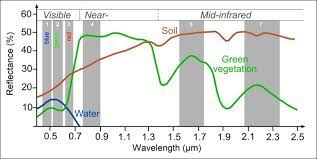

In [58]:
Image(filename='firmas_espectrales.png', width=550) 

In [46]:
df_ = df[df['quality_scene_classification'].isin([4, 5])]
print(df_.shape)
df_.head()

(607, 325)


X     Y        lon       lat departamento municipio   cultivo  \
0  2071  3162 -73.513627  5.914703       BOYACA     TOGUI  PRADERAS   
1  2141  3162 -73.507327  5.914703       BOYACA     TOGUI   PRADERA   
2  2211  3162 -73.501027  5.914703       BOYACA     TOGUI  PRADERAS   
3  2002  3092 -73.519927  5.921003       BOYACA     TOGUI   PRADERA   
4  2071  3092 -73.513627  5.921003       BOYACA     TOGUI      CAÑA   

  topografia    pH         OM        Ca        Mg         K        Na  \
0  PENDIENTE  4.70   3.011138  0.481978  0.213796  0.171674  0.146597   
1   ONDULADO  5.00  12.271341  1.287727  0.418722  0.421729  0.201236   
2  PENDIENTE  5.07   5.326189  3.592768  0.533857  0.213425  0.176261   
3  PENDIENTE  4.55   7.198116  1.198907  0.452394  0.428312  0.220661   
4  PENDIENTE  4.44   4.643188  2.353349  0.526435  0.336426  0.173677   

        400     408.5       417     425.5       434     442.5       451  \
0  0.864947  0.875096  0.874840  0.865835  0.851385  0.838967  0.833089   
1  1.069311  1.083294  1.088555  1.088504  1.085334  1.083149  1.082783   
2  0.877127  0.886268  0.886303  0.879617  0.869511  0.860241  0.855032   
3  1.052266  1.061579  1.063576  1.059229  1.051809  1.045210  1.041014   
4  0.908724  0.922303  0.925949  0.922642  0.915262  0.907996  0.903691   

      459.5       468     476.5       485     493.5       502     510.5  \
0  0.831834  0.829409  0.821083  0.804732  0.781411  0.754565  0.726855   
1  1.083112  1.081964  1.076658  1.066428  1.051789  1.034754  1.016701   
2  0.852350  0.848925  0.842054  0.829852  0.812868  0.793225  0.772665   
3  1.038498  1.035626  1.029633  1.018893  1.003829  0.986159  0.967215   
4  0.901126  0.897690  0.890796  0.878603  0.861210  0.840475  0.817862   

        519     527.5       536     544.5       553     561.5       570  \
0  0.699120  0.671711  0.645430  0.620700  0.597969  0.578164  0.561325   
1  0.998321  0.980104  0.962534  0.945646  0.929548  0.914562  0.900663   
2  0.751851  0.731388  0.712039  0.693998  0.677440  0.662717  0.649682   
3  0.947658  0.928154  0.909437  0.891614  0.874809  0.859553  0.845837   
4  0.794340  0.770628  0.747546  0.725419  0.704433  0.685423  0.668302   

      578.5       587     595.5       604     612.5       621     629.5  \
0  0.547276  0.535821  0.526254  0.517484  0.508804  0.500029  0.490974   
1  0.887977  0.876891  0.866976  0.856959  0.846021  0.834071  0.821366   
2  0.638070  0.627858  0.618654  0.609739  0.600563  0.591058  0.581309   
3  0.833644  0.823037  0.813537  0.804248  0.794578  0.784506  0.774178   
4  0.652799  0.638854  0.626298  0.614638  0.603423  0.592386  0.581148   

        638     646.5       655     663.5       672     680.5       689  \
0  0.481710  0.472552  0.463779  0.455267  0.446919  0.438797  0.430990   
1  0.808295  0.795461  0.783328  0.771584  0.759787  0.748108  0.736988   
2  0.571450  0.561756  0.552484  0.543373  0.534041  0.524660  0.515670   
3  0.763846  0.753718  0.744099  0.734745  0.725192  0.715618  0.706465   
4  0.569675  0.558338  0.547423  0.536721  0.526042  0.515504  0.505360   

      697.5       706     714.5       723     731.5       740     748.5  \
0  0.423477  0.416262  0.409397  0.402926  0.396867  0.391249  0.386078   
1  0.726427  0.716299  0.706607  0.697281  0.688294  0.679613  0.671239   
2  0.507153  0.499010  0.491231  0.483808  0.476694  0.469876  0.463342   
3  0.697826  0.689650  0.681940  0.674678  0.667789  0.661245  0.655072   
4  0.495637  0.486326  0.477467  0.469093  0.461192  0.453767  0.446832   

        757     765.5       774     782.5       791     799.5       808  \
0  0.381368  0.377009  0.372938  0.369263  0.365900  0.362648  0.359597   
1  0.663101  0.655054  0.647190  0.639686  0.632433  0.625190  0.618099   
2  0.457099  0.451096  0.445325  0.439916  0.434844  0.429944  0.425345   
3  0.649251  0.643567  0.638045  0.632857  0.627918  0.623029  0.618234   
4  0.440348  0.434165  0.428308  0.422947  0.417941  0.4130

In [47]:
df_ = df_[[
    'B1', 'B2', 'B3', 'B4', 'B5',
    'B6', 'B7', 'B8', 'B8A', 'B9',
    'B11', 'B12', 'quality_scene_classification'
]].copy()

In [48]:
df_.columns

Index(['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11',
       'B12', 'quality_scene_classification'],
      dtype='object')

Index(['mean', 'std', '+std', '-std'], dtype='object')
(588, 13)
4.0


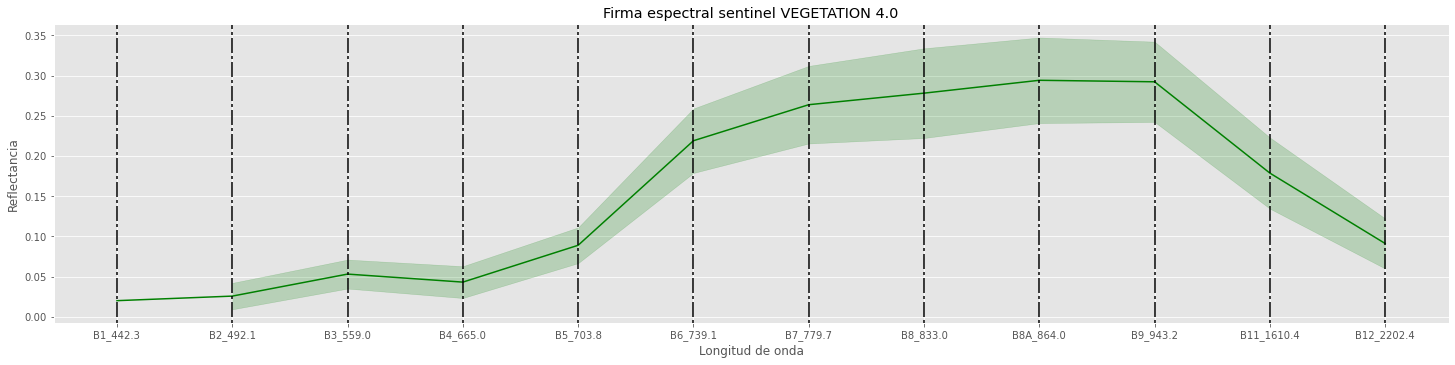

Index(['mean', 'std', '+std', '-std'], dtype='object')
(19, 13)
5.0


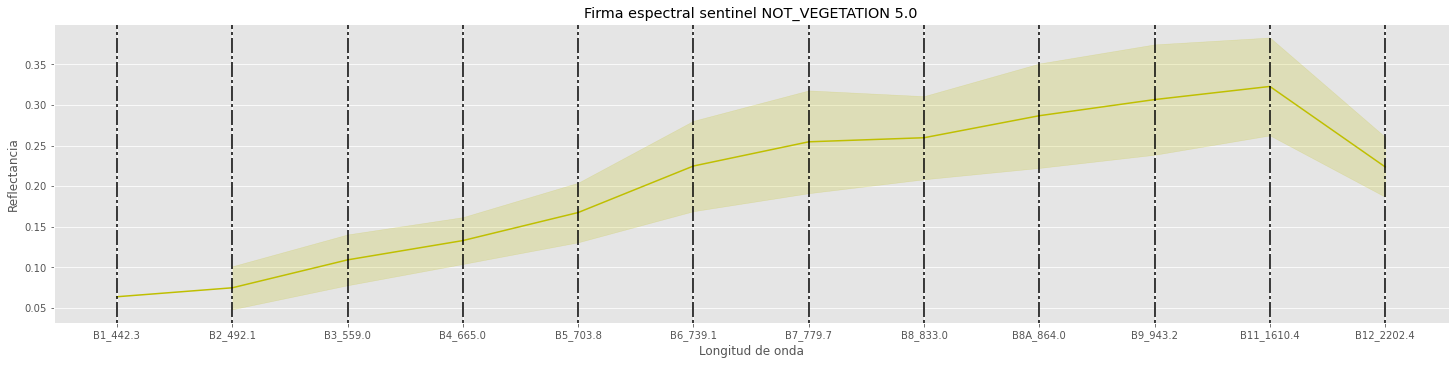

In [51]:
color = ['g', 'y']

for j, i in enumerate(df_['quality_scene_classification'].unique()):

    df_test = df_[df_['quality_scene_classification'] == i]
    df_test_ = pd.DataFrame(df_test[df_.columns[:-1]].mean(axis=0), columns=['mean'])
    df_test_['std'] = df_test[df_.columns[1:13]].std(axis=0)
    df_test_['+std'] = df_test_['mean'] + df_test[df_.columns[1:13]].std(axis=0)
    df_test_['-std'] = df_test_['mean'] - df_test[df_.columns[1:13]].std(axis=0)
    
    print(df_test_.columns)
    print(df_test.shape)
    print(i)
    plt.figure(figsize=(25, 5.5));
    plt.title(f'Firma espectral sentinel {categorize_bands(i)} {i}')
    plt.xlabel('Longitud de onda')
    plt.ylabel('Reflectancia')
    plt.grid(True)
    
    plt.plot([f"{k}_{np.mean(sentinel2_bands[k])}" for k in df_test_['std'].index], df_test_['mean'], color=color[j])
    
    for k in [f"{k}_{np.mean(sentinel2_bands[k])}" for k in df_test_['std'].index]:
        plt.axvline(x=k, linestyle=(0, [2, 2, 10, 2]), color='black')
    
    plt.fill_between(
        [f"{k}_{np.mean(sentinel2_bands[k])}" for k in df_test_['std'].index],
        df_test_['mean'] - df_test_['std'],
        df_test_['mean'] + df_test_['std'],
        color=color[j], alpha=0.2
    )
    plt.savefig(f'spetral_bands_classification_{categorize_bands(i)}.png')
    plt.show()

In [50]:
df_.describe()

B1          B2          B3          B4          B5          B6  \
count  607.000000  607.000000  607.000000  607.000000  607.000000  607.000000   
mean     0.021620    0.027451    0.055036    0.046115    0.091539    0.219164   
std      0.022067    0.018812    0.020922    0.025433    0.026541    0.040572   
min      0.000100    0.000700    0.014800    0.013700    0.032300    0.066100   
25%      0.010150    0.016500    0.042600    0.030100    0.075300    0.194550   
50%      0.017200    0.024000    0.051600    0.039500    0.088000    0.217900   
75%      0.026400    0.032050    0.062550    0.052500    0.103700    0.244850   
max      0.240500    0.215900    0.199600    0.191700    0.255700    0.365500   

               B7          B8         B8A          B9         B11         B12  \
count  607.000000  607.000000  607.000000  607.000000  607.000000  607.000000   
mean     0.263474    0.277531    0.293859    0.292674    0.183273    0.095430   
std      0.048696    0.055657    0.053503    0.050529    0.051270    0.038852   
min      0.078000    0.091200    0.086600    0.084700    0.051200    0.023700   
25%      0.234300    0.246450    0.262950    0.264450    0.150350    0.070100   
50%      0.262600    0.275900    0.293800    0.293600    0.176500    0.087200   
75%      0.295500    0.312200    0.326550    0.323200    0.207300    0.108450   
max      0.404400    0.445800    0.460600    0.462000    0.421300    0.281900   

       quality_scene_classification  
count                    607.000000  
mean                       4.031301  
std                        0.174275  
min                        4.000000  
25%                        4.000000  
50%                        4.000000  
75%                        4.000000  
max                        5.000000

C:\Users\camil\miniconda3\envs\Tesis\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


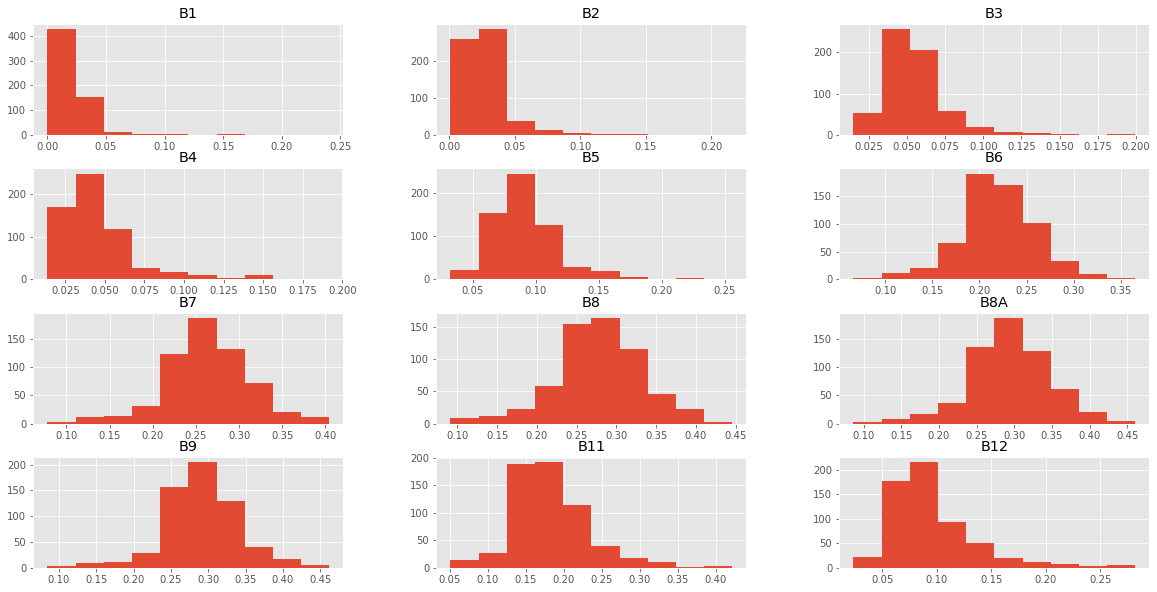

In [52]:
df_.drop(['quality_scene_classification'], 1).hist(figsize=(20, 10))
plt.show()

<AxesSubplot:>

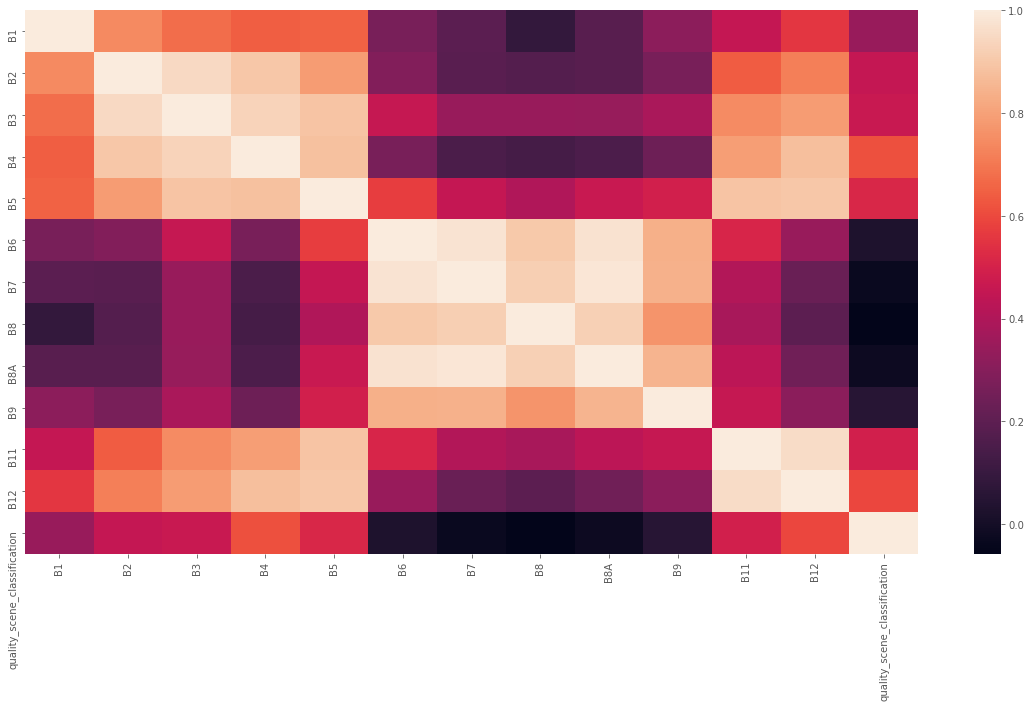

In [53]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_.corr())

In [14]:
df_.columns

Index(['ID', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9',
       'B11', 'B12', 'NDVI', 'GNDVI', 'EVI', 'AVI', 'SAVI', 'NDMI', 'MSI',
       'GCI', 'NBR', 'BSI', 'NDWI', 'NDSI', 'ARVI', 'SIPI',
       'quality_scene_classification'],
      dtype='object')

In [17]:
cols = [
    'B1', 'B2', 'B3', 'B4',
    'B5', 'B6', 'B7', 'B8',
    'B8A', 'B9', 'B11', 'B12'
]

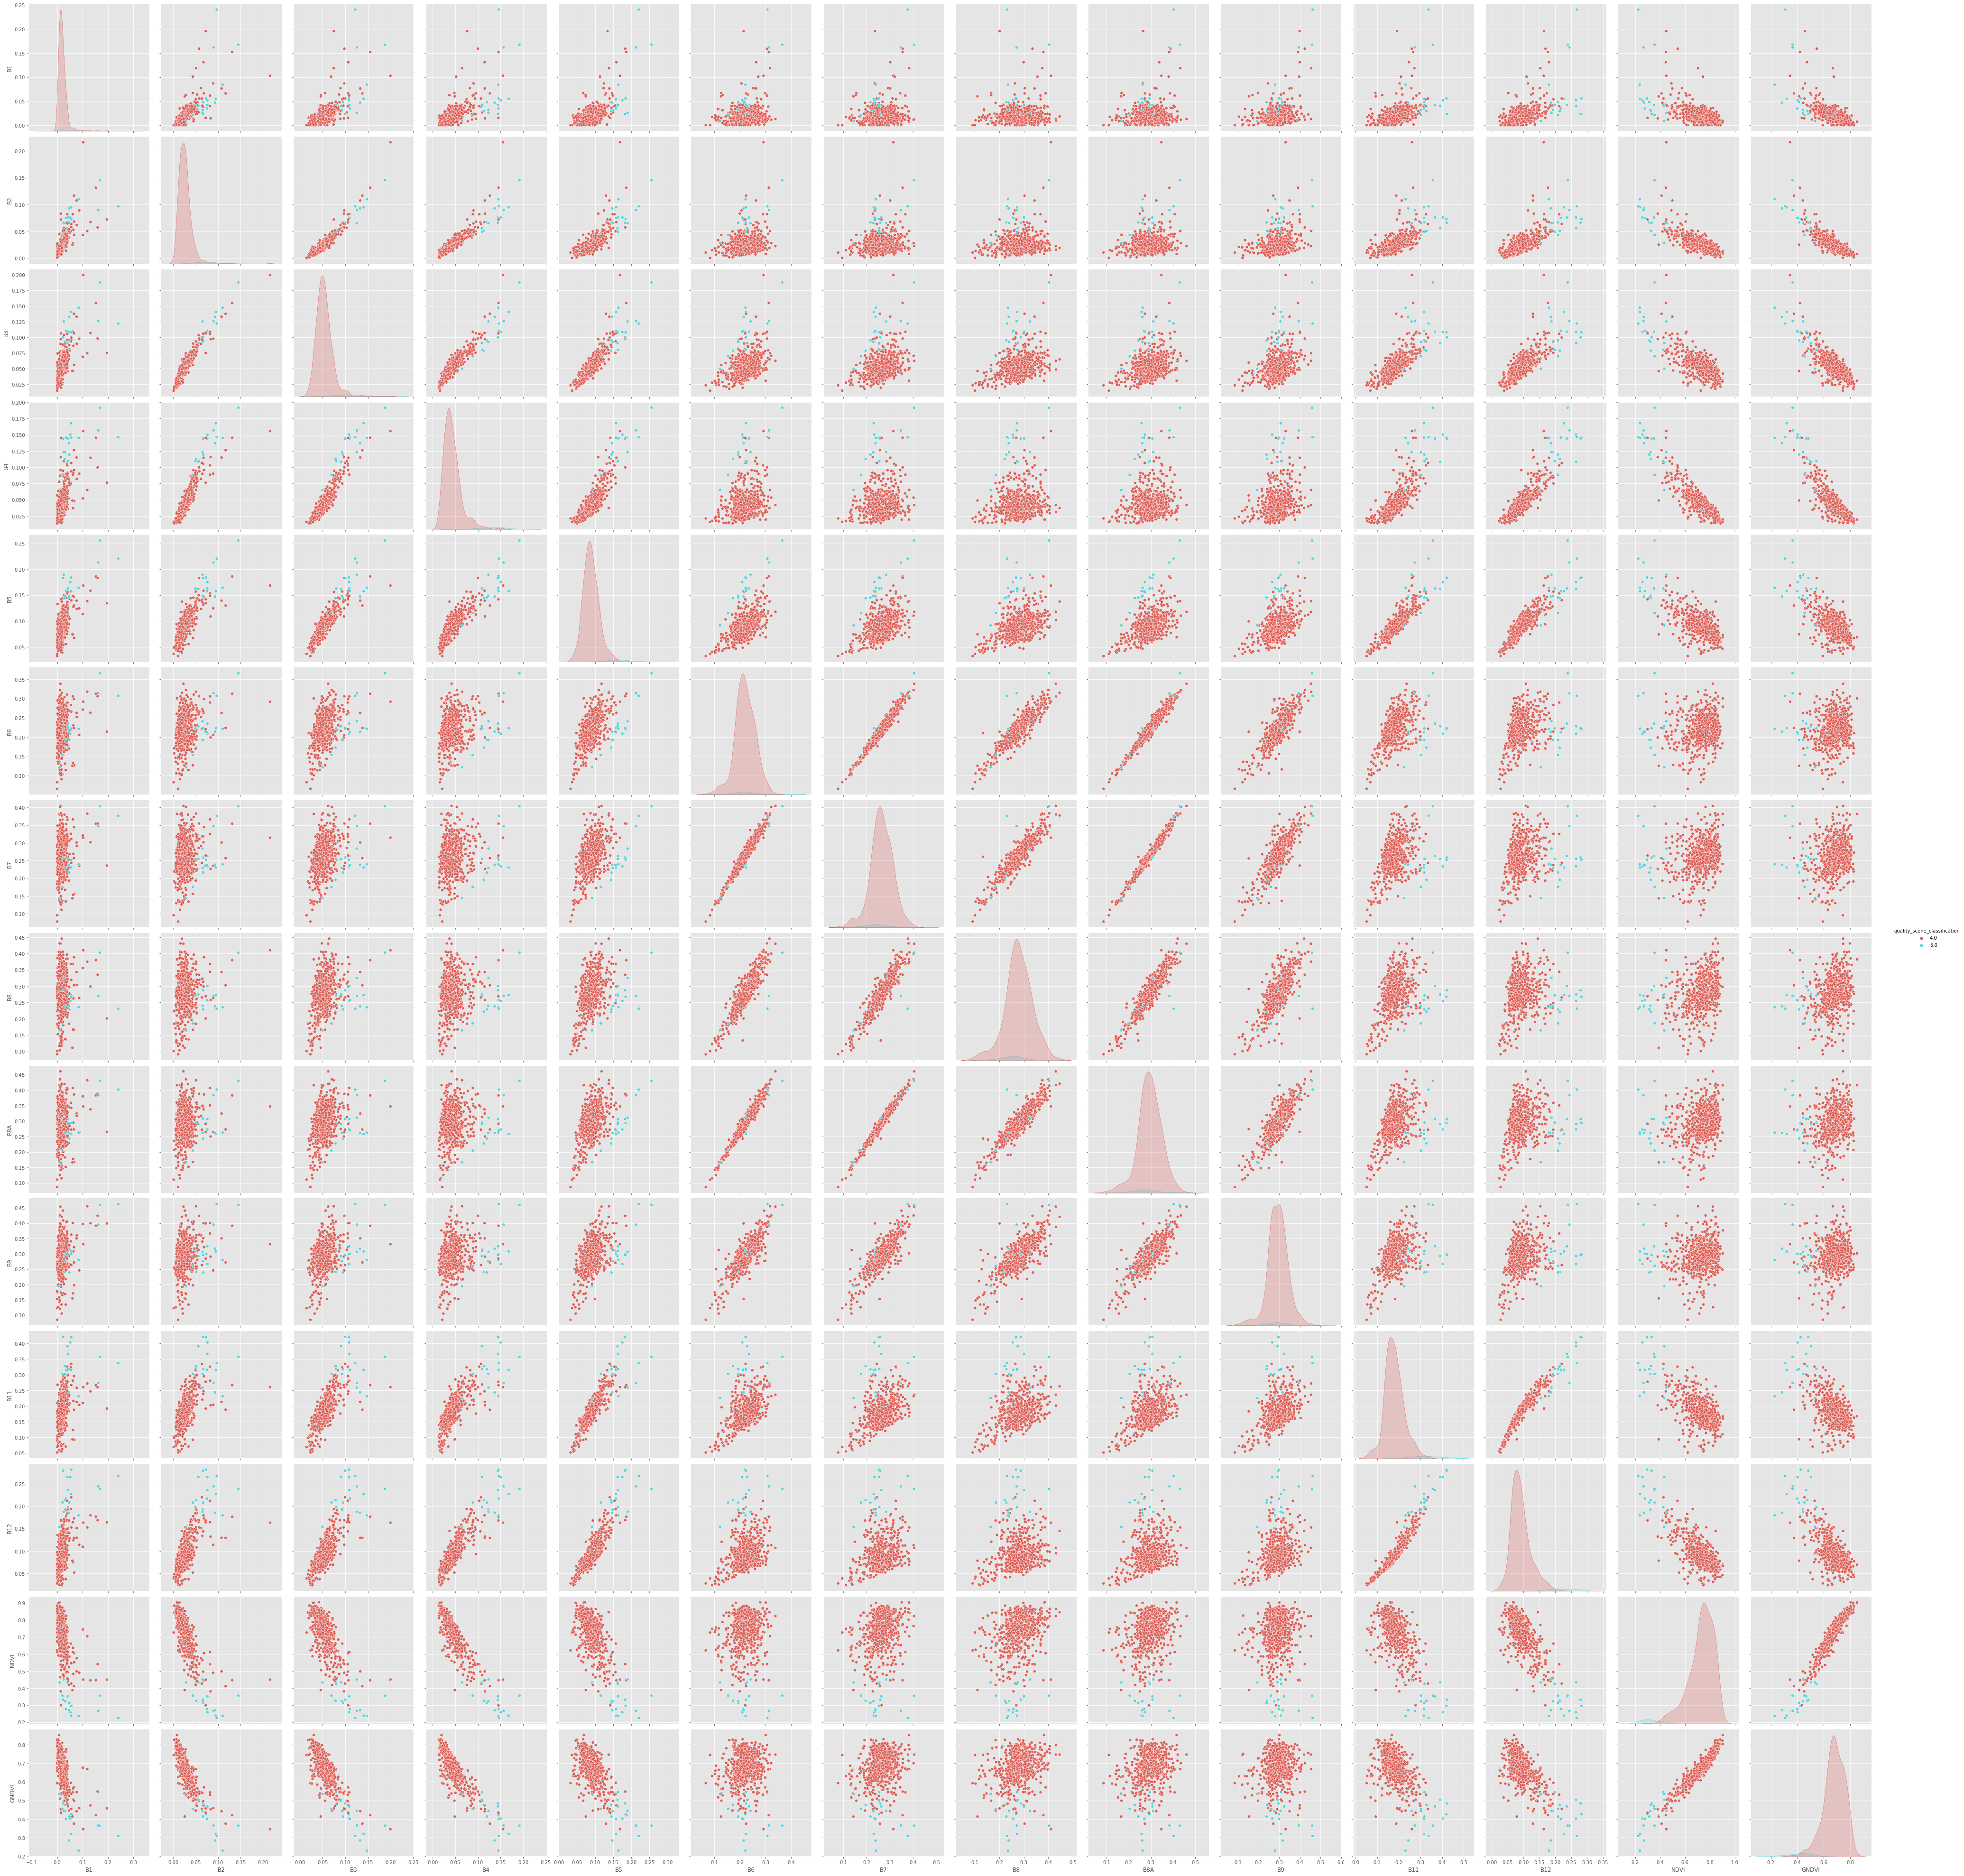

In [16]:
sns.pairplot(
    df_.dropna(),
    hue='quality_scene_classification',
    height=4,
    vars=cols,
    kind='scatter',
    palette=sns.color_palette("hls", 2)
)

In [19]:
# df_[cols]

In [20]:
X = np.array(df_[cols])
y = np.array(df_['quality_scene_classification'], dtype=int)
X.shape

(607, 12)

In [21]:
# X

[KMeans(n_clusters=1), KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=4), KMeans(n_clusters=5), KMeans(n_clusters=6), KMeans(n_clusters=7), KMeans(), KMeans(n_clusters=9), KMeans(n_clusters=10), KMeans(n_clusters=11), KMeans(n_clusters=12), KMeans(n_clusters=13), KMeans(n_clusters=14), KMeans(n_clusters=15), KMeans(n_clusters=16), KMeans(n_clusters=17), KMeans(n_clusters=18), KMeans(n_clusters=19)]
[11.695086931268536, 7.247463708833664, 5.680396332404134, 4.431226080667621, 3.7821128503876076, 3.3034367544335073, 3.001518725455443, 2.7228112257520625, 2.4787759751738125, 2.2958031533389107, 2.177077249618748, 2.10474979191996, 1.9908198082070132, 1.9112161190492125, 1.8511643290519397, 1.7922771466684948, 1.7402473902351474, 1.6805808058525382, 1.6248841508939442]


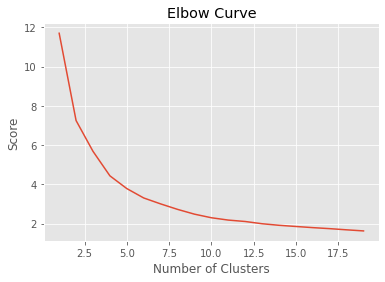

In [65]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
print(kmeans)
score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]
print(score)
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [132]:
kmeans = KMeans(n_clusters=4).fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.05792759 0.06603276 0.09813448 0.10478621 0.14715    0.24227759
  0.27789138 0.28940862 0.3094569  0.32035517 0.28628621 0.18361207]
 [0.01988953 0.02606702 0.05724136 0.04303822 0.09790838 0.25748639
  0.31094188 0.33112199 0.34615445 0.33285707 0.19449215 0.09474974]
 [0.016745   0.022545   0.04841812 0.03934531 0.08170781 0.20251469
  0.2449875  0.25778781 0.27386469 0.27598875 0.16707344 0.08457   ]
 [0.01596053 0.01683947 0.03390263 0.02903947 0.05742895 0.13146316
  0.15855    0.15629737 0.17556842 0.18896579 0.10606842 0.05571053]]


In [133]:
df_temp = pd.DataFrame(X, columns=cols)
df_temp['y'] = y
df_temp['label'] = labels

In [134]:
df_temp.head()

B1      B2      B3      B4      B5      B6      B7      B8     B8A  \
0  0.0034  0.0099  0.0324  0.0249  0.0632  0.1954  0.2388  0.2854  0.2777   
1  0.0001  0.0109  0.0413  0.0331  0.0947  0.2397  0.2881  0.2968  0.3334   
2  0.0029  0.0114  0.0404  0.0312  0.0795  0.2079  0.2486  0.2629  0.2728   
3  0.0063  0.0146  0.0531  0.0318  0.0891  0.2742  0.3251  0.3946  0.3670   
4  0.0010  0.0020  0.0178  0.0157  0.0476  0.1580  0.1912  0.1848  0.2066   

       B9     B11     B12  y  label  
0  0.2969  0.1356  0.0579  4      2  
1  0.3025  0.1763  0.0828  4      1  
2  0.2971  0.1621  0.0833  4      2  
3  0.2933  0.1736  0.0795  4      1  
4  0.2519  0.0977  0.0480  4      3

<AxesSubplot:title={'center':'Firma espectral sentinel'}, xlabel='Longitud de onda', ylabel='Reflectancia'>

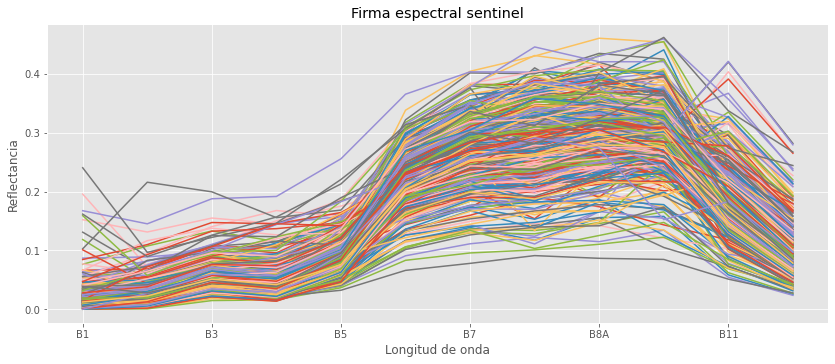

In [135]:
df_temp[df_temp.columns[:-2]].T.plot(
        title=f'Firma espectral sentinel',
        xlabel='Longitud de onda',
        ylabel='Reflectancia',
        fontsize=10,
        grid=True,
        legend=False,
        figsize=(14, 5.5)
    )

In [136]:
df_test[df_test.columns[:-2]].T[17].index

Index(['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11',
       'B12'],
      dtype='object')

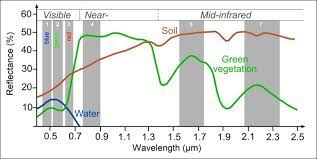

In [137]:
Image(filename='firmas_espectrales.png', width=508) 

(58, 14)


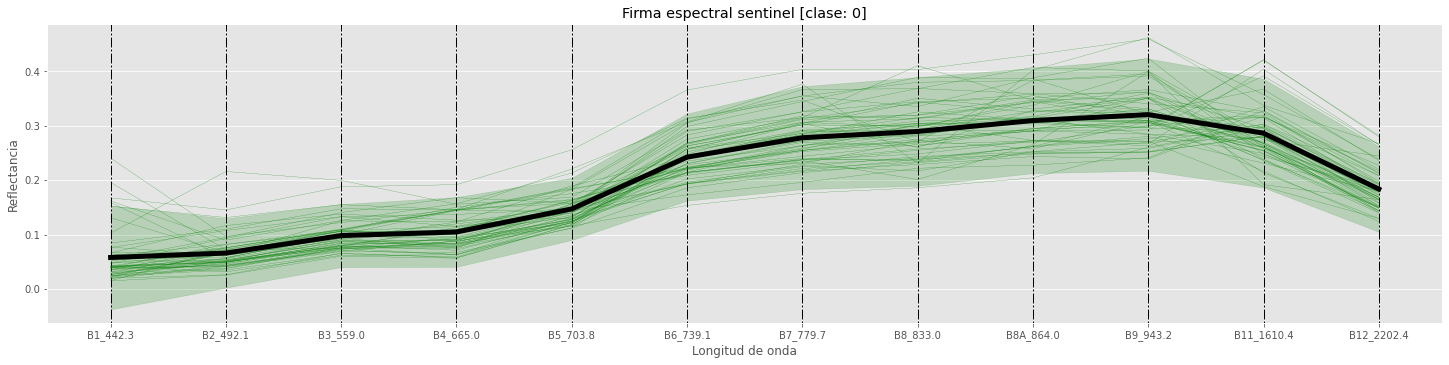

(191, 14)


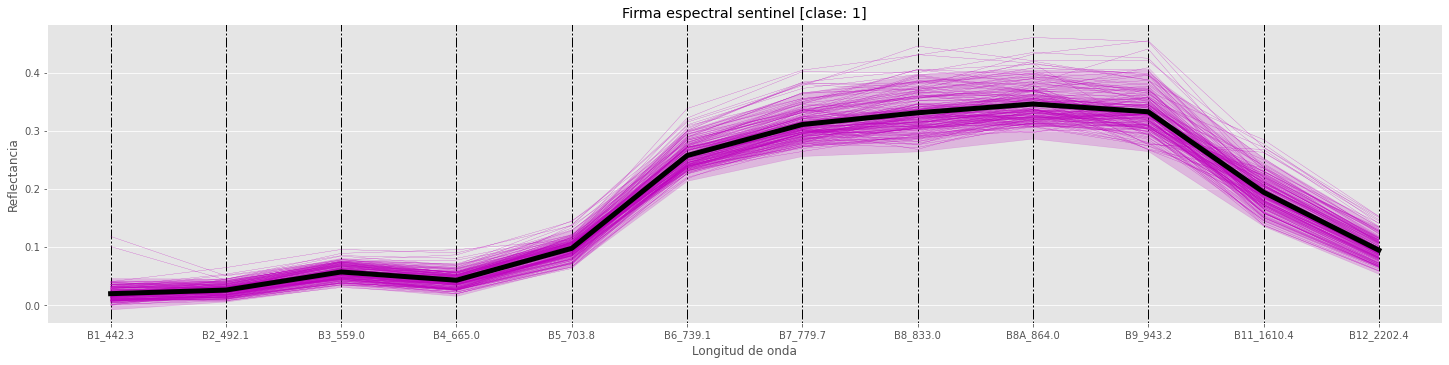

(320, 14)


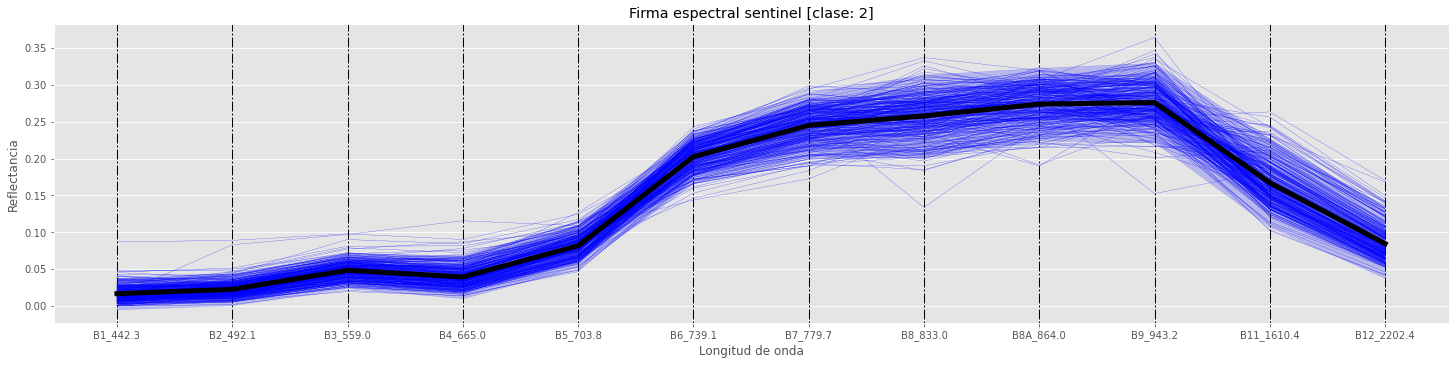

(38, 14)


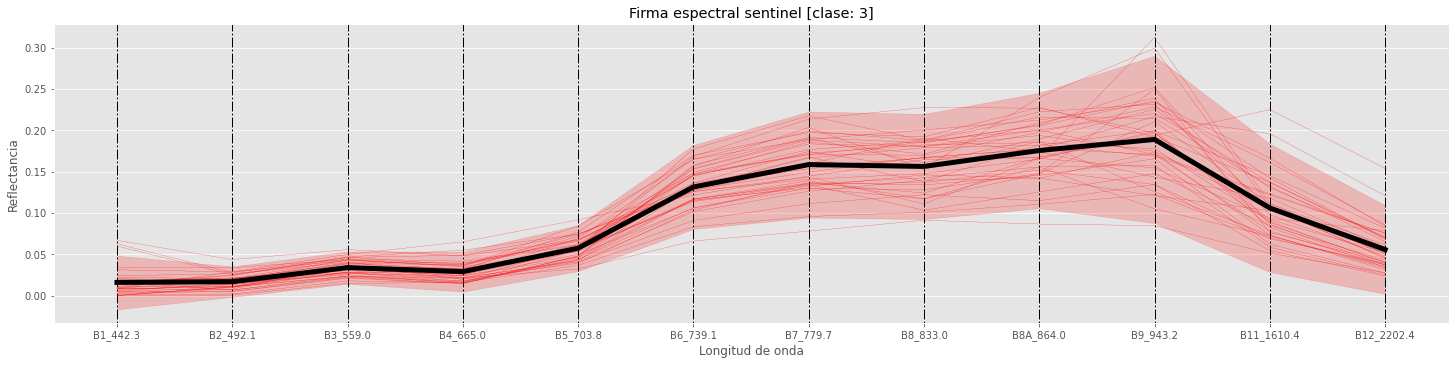

In [151]:
color = ['g', 'm', 'b', 'r']

for j, i in enumerate(sorted(df_temp['label'].unique())):

    df_test = df_temp[df_temp['label'] == i]
    df_test_ = pd.DataFrame(df_test[df_.columns[1:13]].mean(axis=0), columns=['mean'])
    df_test_['std'] = df_test[df_.columns[1:13]].std(axis=0)
    
    print(df_test.shape)
    plt.figure(figsize=(25, 5.5));
    plt.title(f'Firma espectral sentinel [clase: {i}]')
    plt.xlabel('Longitud de onda')
    plt.ylabel('Reflectancia')
    plt.grid(True)
    
    for k in [f"{i}_{np.mean(sentinel2_bands[i])}" for i in df_test_['std'].index]:
        plt.axvline(x=k, linestyle=(0, [2, 2, 10, 2]), color='black', linewidth=1)
    
    plt.fill_between(
        [f"{i}_{np.mean(sentinel2_bands[i])}" for i in df_test_['std'].index],
        df_test_['mean'] - 2*df_test_['std'],
        df_test_['mean'] + 2*df_test_['std'],
        color=color[j], alpha=0.2
    )
    
    for k in df_test.index:
        plt.plot(
            [f"{i}_{np.mean(sentinel2_bands[i])}" for i in df_test_['std'].index], df_test[df_test.columns[:-2]].T[k],
            linewidth=0.2, color=color[j]
        )#.plot(legend=False, secondary_y=True, figsize=(25, 5.5))
        
    plt.plot([f"{i}_{np.mean(sentinel2_bands[i])}" for i in df_test_['std'].index], df_test_['mean'], color='k', linewidth=5)
    plt.show()

0   g
1   m
2   b
3   r


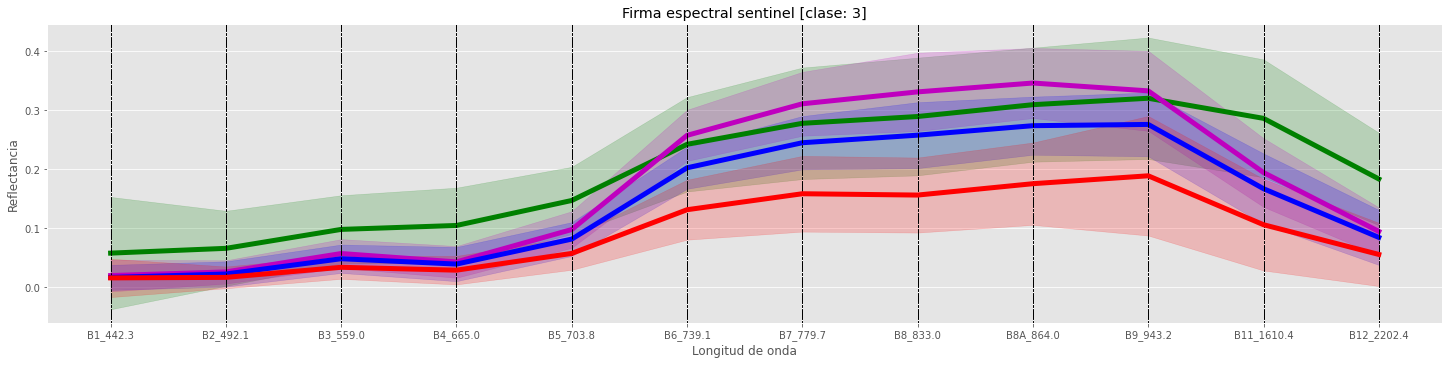

In [154]:
color = ['g', 'm', 'b', 'r']
plt.figure(figsize=(25, 5.5));
plt.title(f'Firma espectral sentinel [clase: {i}]')
plt.xlabel('Longitud de onda')
plt.ylabel('Reflectancia')
plt.grid(True)
for j, i in enumerate(sorted(df_temp['label'].unique())):
    print(i, ' ',color[j])
    df_test = df_temp[df_temp['label'] == i]
    df_test_ = pd.DataFrame(df_test[df_.columns[1:13]].mean(axis=0), columns=['mean'])
    df_test_['std'] = df_test[df_.columns[1:13]].std(axis=0)

    for k in [f"{i}_{np.mean(sentinel2_bands[i])}" for i in df_test_['std'].index]:
        plt.axvline(x=k, linestyle=(0, [2, 2, 10, 2]), color='black', linewidth=1)
    
    plt.fill_between(
        [f"{i}_{np.mean(sentinel2_bands[i])}" for i in df_test_['std'].index],
        df_test_['mean'] - 2*df_test_['std'],
        df_test_['mean'] + 2*df_test_['std'],
        color=color[j], alpha=0.2
    )
    
#     for k in df_test.index:
#         plt.plot(
#             [f"{i}_{np.mean(sentinel2_bands[i])}" for i in df_test_['std'].index], df_test[df_test.columns[:-2]].T[k],
#             linewidth=0.2, color=color[j]
#         )#.plot(legend=False, secondary_y=True, figsize=(25, 5.5))
        
    plt.plot([f"{i}_{np.mean(sentinel2_bands[i])}" for i in df_test_['std'].index], df_test_['mean'], color=color[j], linewidth=5)
#     plt.show()